# Análisis Predictivo para una Tienda Minorista 

In [71]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

#algoritmos
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [72]:
ruta = '/Users/leidygarciaguzman/Documents/DS-Udemy/Datos/ventas2.csv'
df = pd.read_csv(ruta)
df.head()

,Fecha,DíaDeLaSemana,Promociones,Festivo,Ventas
0,2022-01-01,6,0,0,4033
1,2022-01-02,7,0,1,4012
2,2022-01-03,1,0,0,1608
3,2022-01-04,2,1,0,2046
4,2022-01-05,3,0,0,2484


In [73]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Fecha          365 non-null    object
 1   DíaDeLaSemana  365 non-null    int64 
 2   Promociones    365 non-null    int64 
 3   Festivo        365 non-null    int64 
 4   Ventas         365 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 14.4+ KB


In [74]:
df['Fecha'] = pd.to_datetime(df['Fecha'])

In [75]:
df.shape

(365, 5)

In [76]:
df.isna().sum() #No hay nulos 

Fecha            0
DíaDeLaSemana    0
Promociones      0
Festivo          0
Ventas           0
dtype: int64

In [77]:
#Normalizo las columnas ('DíaDeLaSemana','Promociones','Festivo') para que tengan una misma escala
escala = MinMaxScaler(feature_range=(0,1))

columnas_para_escalar = df.drop(['Ventas', 'Fecha'], axis=1).columns

normado = escala.fit_transform(df[columnas_para_escalar])

df_normado = pd.DataFrame(data=normado, columns=columnas_para_escalar)

df_normado['Ventas'] = df['Ventas']
df_normado['Fecha'] = df['Fecha']
df_normado

,DíaDeLaSemana,Promociones,Festivo,Ventas,Fecha
0,0.833333,0.0,0.0,4033,2022-01-01
1,1.000000,0.0,1.0,4012,2022-01-02
2,0.000000,0.0,0.0,1608,2022-01-03
3,0.166667,1.0,0.0,2046,2022-01-04
4,0.333333,0.0,0.0,2484,2022-01-05
...,...,...,...,...,...
360,0.166667,1.0,0.0,2189,2022-12-27
361,0.333333,0.0,0.0,2548,2022-12-28
362,0.500000,0.0,0.0,3018,2022-12-29
363,0.666667,0.0,0.0,3591,2022-12-30


In [78]:
df_normado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   DíaDeLaSemana  365 non-null    float64       
 1   Promociones    365 non-null    float64       
 2   Festivo        365 non-null    float64       
 3   Ventas         365 non-null    int64         
 4   Fecha          365 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 14.4 KB


In [79]:
X=df_normado.drop(['Ventas','Fecha'],axis=1) #Variable independiente
y=df['Ventas'] #Variable Dependiente

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8,random_state=42)

## Análisis Exploratorio de Datos (EDA) 

In [81]:
df.describe()

,DíaDeLaSemana,Promociones,Festivo,Ventas
count,365.000000,365.000000,365.000000,365.000000
mean,4.005479,0.200000,0.142466,2997.219178
std,2.002738,0.400549,0.350007,942.096284
min,1.000000,0.000000,0.000000,1305.000000
25%,2.000000,0.000000,0.000000,2195.000000
50%,4.000000,0.000000,0.000000,3074.000000
75%,6.000000,0.000000,0.000000,3979.000000
max,7.000000,1.000000,1.000000,4404.000000


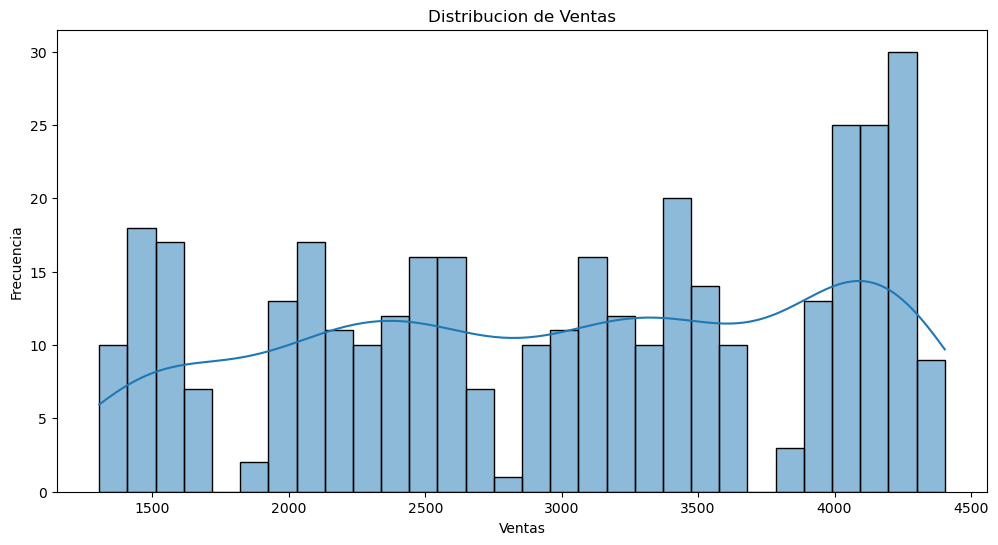

In [82]:
#Distribución de Ventas 
plt.figure(figsize=(12,6))
sns.histplot(df['Ventas'], bins=30, kde=True)
plt.title('Distribucion de Ventas')
plt.xlabel('Ventas')
plt.ylabel('Frecuencia');

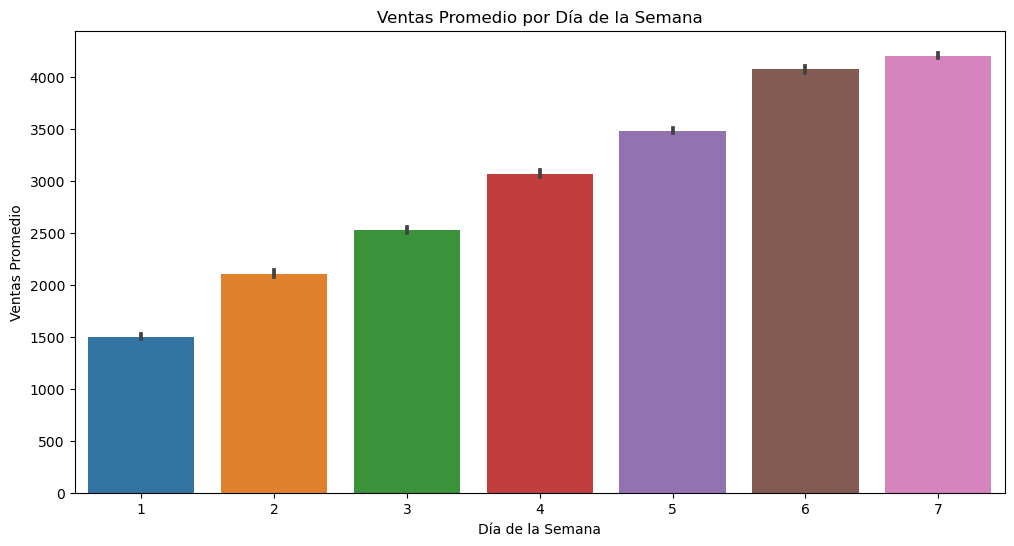

In [83]:
#Relación entre ventas y día de la semana con promedio de ventas
plt.figure(figsize=(12,6))
sns.barplot(data=df, x='DíaDeLaSemana', y='Ventas')
plt.title('Ventas Promedio por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Ventas Promedio');


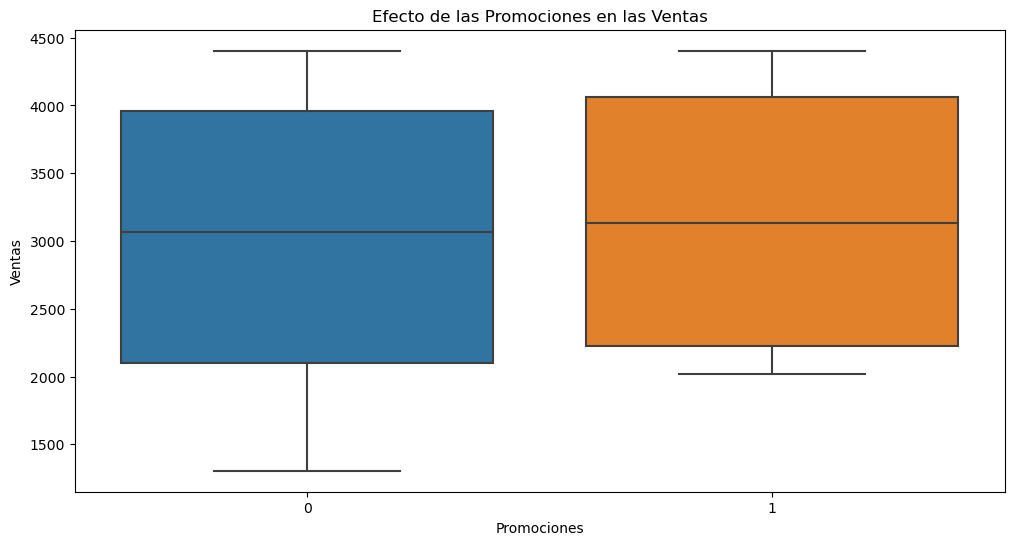

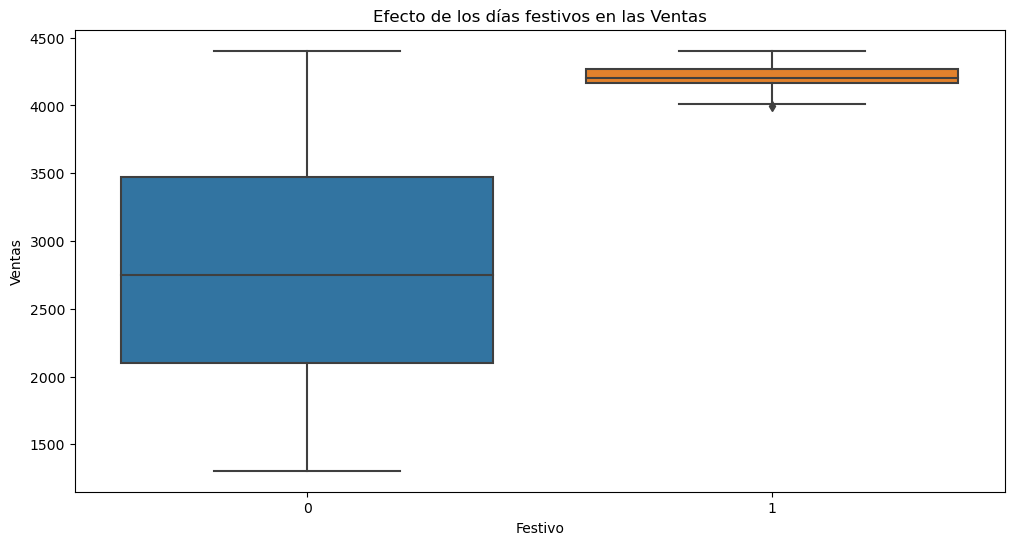

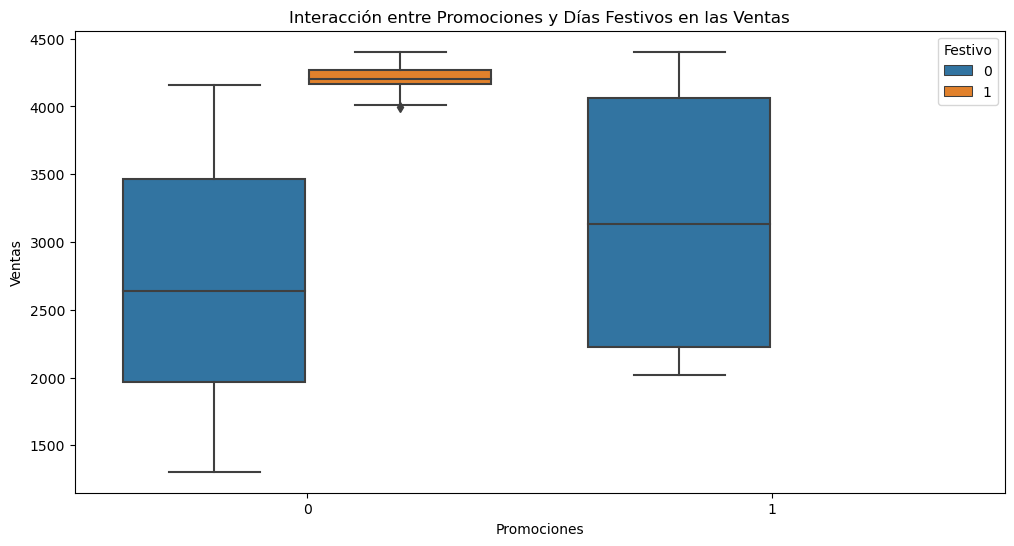

In [84]:
#Boxplot para comparar ventas con promociones y sin promociones
plt.figure(figsize=(12,6))
sns.boxplot(x='Promociones', y='Ventas', data=df)
plt.title('Efecto de las Promociones en las Ventas')

#Boxplot que compara las ventas para los días normales y festivos. 
plt.figure(figsize=(12,6))
sns.boxplot(x='Festivo', y='Ventas', data=df)
plt.title('Efecto de los días festivos en las Ventas')

#Boxplot para iteracciones entre promociones y días festivos en las ventas
plt.figure(figsize=(12,6))
sns.boxplot(x='Promociones', y='Ventas', hue='Festivo', data=df)
plt.title('Interacción entre Promociones y Días Festivos en las Ventas');

## Selección del Modelo 

In [85]:
#Almaceno en una variable los 3 modelos 
modelos = [ 
            ('Modelo Lineal', LinearRegression()),
            ('Modelo Arbol', DecisionTreeRegressor(random_state=42)),
            ('Modelo Bosque', RandomForestRegressor(random_state=42))
]

In [86]:
#Entrenar los modelos y mostrar puntajes

for nombre, modelo in modelos: 
    modelo.fit(X_train, y_train)
    puntaje=modelo.score(X_test, y_test)
    print(f'{nombre}: {puntaje}')

Modelo Lineal: 0.9924245101323563
Modelo Arbol: 0.9923508015371342
Modelo Bosque: 0.9923097376813321


## Entrenamiento y evaluación del modelo 

In [87]:
#Trabajo con el Modelo Lineal porque tiene el score mas alto 
modelo_lineal = LinearRegression()

#Entreno el modelo con datos de entrenamiento 
modelo_lineal.fit(X_train, y_train)
predicciones_lineal = modelo_lineal.predict(X_test)

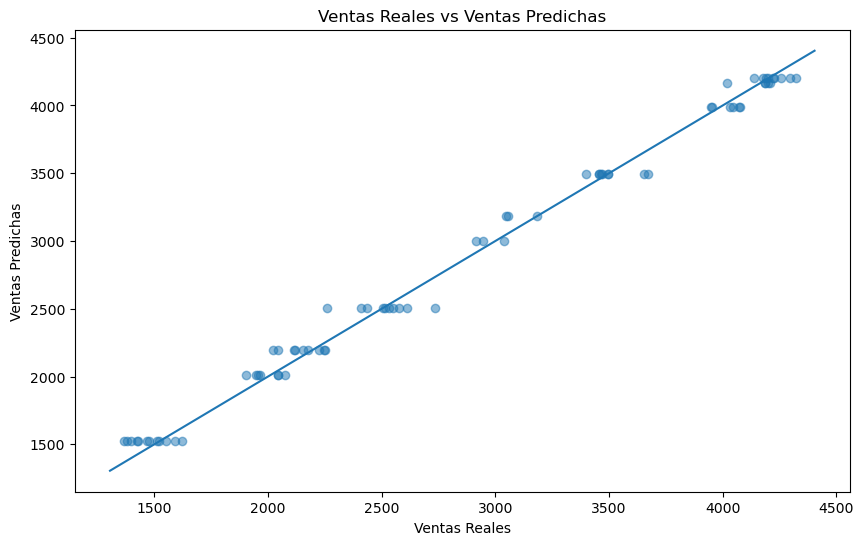

In [95]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predicciones_lineal, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()])
plt.xlabel('Ventas Reales')
plt.ylabel('Ventas Predichas')
plt.title('Ventas Reales vs Ventas Predichas');

#Gráfico muestra una fuerte relación positiva entre los valores reales y predichos 

In [92]:
df_test = pd.DataFrame({'Real': y_test, 'Predicho': predicciones_lineal})
df_test = df_test.sort_index()

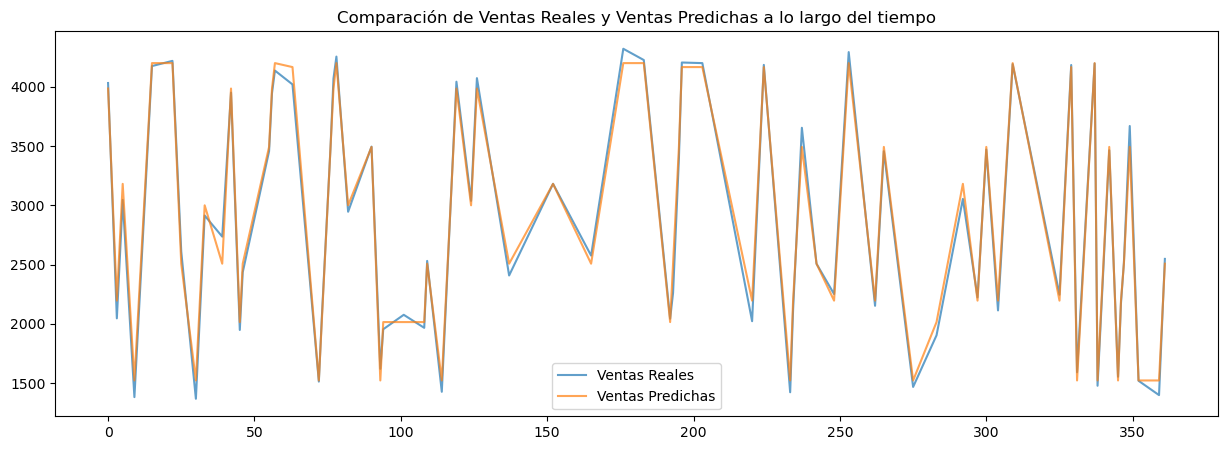

In [94]:
plt.figure(figsize=(15,5))
plt.plot(df_test['Real'], label='Ventas Reales', alpha=0.7)
plt.plot(df_test['Predicho'], label='Ventas Predichas', alpha=0.7)
plt.legend()
plt.title('Comparación de Ventas Reales y Ventas Predichas a lo largo del tiempo');
